# Statistical-Methods Homework4: Simple Linear Regression（简单线性回归）


## 背景描述
考虑一个检验纸制品性能的案例：为了研究纸制品的**抗拉强度**与**纸浆中硬木的含量**有关。在试验工厂生产了10个样品。

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Hardwood | 纸张硬木含量 | discrete variable | $\mathbb{Z}^+$ |
| （因变量）Strength | 抗拉强度 | continuous variable | $\mathbb{R}$ |

#### Tasks:
1. 请用统计模型描述**纸浆中硬木的含量**与纸制品的**抗拉强度**的关系.
2. 请问Q1中所建立的模型是否合理.
3. 如果需要纸制品的**抗拉强度**为 18，请给出一个合理区间，预测纸浆中硬木的含量应为多少.

In [53]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [54]:
print('Data: \n')
pd.read_csv('Project4.csv')

Data: 



,Unnamed: 0,Hardwood,Strength
0,1,10,160
1,2,15,171
2,3,15,175
3,4,20,182
4,5,20,184
5,6,20,181
6,7,25,188
7,8,25,193
8,9,28,195
9,10,30,200


In [55]:
# Import stats package
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

#### Solution for Question1

本次实验中使用 $\alpha=0.05$ 的水平

In [79]:
alpha = 0.05
n = 10

x = pd.read_csv('Project4.csv')
data = x.values[:,1:3]
df = pd.DataFrame(data, columns = ['Hardwood', 'Strength'])
print(df.head())
print('\n')
print(np.var(data[:,0]))

# Do the simple linear regression
model = ols('Strength ~ Hardwood', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
model.summary()

   Hardwood  Strength
0        10       160
1        15       171
2        15       175
3        20       182
4        20       184


35.76
参数估计值: 
 Intercept    143.8244
Hardwood       1.8786
dtype: float64


/Users/sunqiushi/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     260.0
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           2.20e-07
Time:                        08:08:26   Log-Likelihood:                -20.973
No. Observations:                  10   AIC:                             45.95
Df Residuals:                       8   BIC:                             46.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    143.8244      2.522     57.039      0.000     138.010     149.639
Hardwood       1.8786      0.117     16.125      0.000       1.610       2.147
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.701
Skew:                           0.157   Prob(JB):                        0.704
Kurtosis:                       1.742   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Strength_hat = 143.8244 + 1.8786 * hardwood


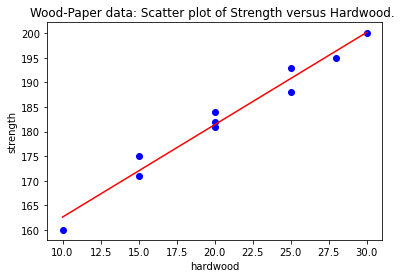

In [80]:
# 输出一元线性回归方程
print('Strength_hat =', round(beta[0], 4), '+', round(beta[1], 4), '* hardwood')

# 画图
x = data[:, 0]
y = data[:, 1]
Y = model.fittedvalues   # 预测值
plt.scatter(x, y, c = 'blue', label='Strength') # 原始数据
plt.plot(x, Y, 'red', label='Fit_Strength') # 拟合数据
plt.title('Wood-Paper data: Scatter plot of Strength versus Hardwood. ')
plt.xlabel('hardwood')
plt.ylabel('strength')
plt.show()

由上述分析可知，该线性回归模型为：$Strength = 143.8244 + 1.8786 * Hardwood$

#### Solution for Question2

检验假设：$H_0: \beta_1=0$ vs $H_1: \beta_1 \neq 0$

以下进行三种检验，他们的有效性在一元线性回归模型下等价：
1. F检验
2. t检验
3. 相关系数检验


In [81]:
x_mean = np.mean(data[:,0])  # x mean
y_mean = np.mean(data[:,1])  # y mean
sigma2 = sum((y - beta[0] - beta[1] * x) ** 2) / (n - 2)  # variance
sigma = np.sqrt(sigma2)  # standard deviation
lxx = sum((x - np.mean(x)) ** 2)  # l_xx
lyy = sum((y - np.mean(y)) ** 2)  # l_yy
lxy = sum((x - np.mean(x)) * (y - np.mean(y)))  # l_xy

**一元线性模型的显著性检验——F 检验:**

In [82]:
# 先使用F检验，打印ANOVA Table
anova_results = round(anova_lm(model), 2)
print('The ANOVA table: \n', anova_results)

The ANOVA table: 
            df   sum_sq  mean_sq      F  PR(>F)
Hardwood  1.0  1262.07  1262.07  260.0     0.0
Residual  8.0    38.83     4.85    NaN     NaN


In [83]:
# 法1：
pVal1 = anova_results['PR(>F)'][0]

if pVal1 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0.') 

Since p-value < 0.05, reject H0.


In [84]:
# 法2：
F0 = anova_results['F'][0]
F = round(f.ppf(1 - alpha, dfn = 1,dfd = n - 2), 2)
if F0 > F:
    print('Since F0 > F(0.95, 1, 8) = ', F, ', reject H0.')
else:
    print('Accept H0.') 

Since F0 > F(0.95, 1, 8) =  5.32 , reject H0.


**一元线性模型的显著性检验——t 检验:**

In [85]:
# t 检验
t0 = beta[1] * np.sqrt(lxx) / sigma # 求t 值
print('t0 value = ', round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - 2) # 分位点函数（CDF 的逆）
print('t\'s crtitical value：', round(tVal, 4))
pVal2 = t.sf(t0, n - 2) # 用残存函数（1-CDF）求p 值
# pVal2 = 1 - t.cdf(t0, n - 2)
print('P value= ', round(pVal2, 4))

t0 value =  16.1245
t's crtitical value： 2.306
P value=  0.0


In [86]:
# method 1 test p-value
if pVal2 < alpha:
    print ('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.')


Since p-value < 0.05, reject H0.


In [87]:
# method 2 test t：
if abs(t0) > tVal:
    print('Since t0 > t(0.975,8) = ', round(tVal, 4), ', reject H0.')
else:
    print('Accept H0.')

Since t0 > t(0.975,8) =  2.306 , reject H0.


**Correlation test**

相关系数检验假设：$H_0: \rho=0$ vs $H_1: \rho \neq 0$

In [88]:
# 进行相关系数检验
# method1:使用相关系数公示
r1 = lxy / np.sqrt(lxx * lyy)
print('Correlation=', round(r1, 4))

Correlation= 0.985


In [89]:
# method2：pandas DataFrame.corr()
r2 = df.corr()
print('Correlation:\n', round(r2, 4))

Correlation:
           Hardwood  Strength
Hardwood     1.000     0.985
Strength     0.985     1.000


In [90]:
corrVal = np.sqrt(F/(F+(n-2)))
if abs(r1) > corrVal:
    print ('\nSince r > r(0.975, 12) = ', round(corrVal, 4), ', reject H0.')
else:
    print('\nAccept H0.')


Since r > r(0.975, 12) =  0.632 , reject H0.


由上述分析可得，Q1中建立的模型是合理的

接下来进行残差分析

**残差分析0:计算抗拉强度残差**

In [91]:
# 计算抗拉强度的残差
data_res = data * 1
for i in range(n):
    data_res[:,1] = y - Y
df = pd.DataFrame(data_res, columns = ['Hardwood', 'Strength'])
print(df.head())

   Hardwood  Strength
0        10        -2
1        15        -1
2        15         2
3        20         0
4        20         2


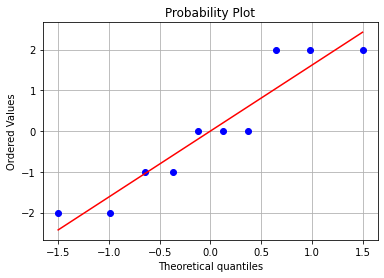

In [92]:
# 绘制残差的正态概率图
res = data_res[:, 1]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
plt.grid()
plt.show()

Text(0, 0.5, '$e_i$')

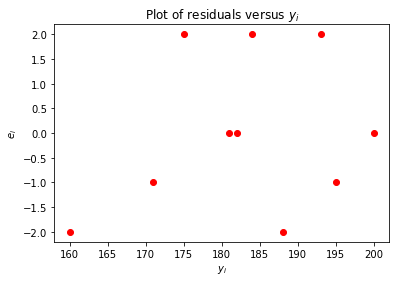

In [93]:
# 残差与预测值的关系图
plt.scatter(data[:,1], res, c = 'red')
plt.title('Plot of residuals versus $y_i$')
plt.xlabel('$y_i$')
plt.ylabel('$e_i$')

从以上残差分析图可观察到，残差大致符合正态分布，通过残差与预测值关系图也可以看出残差与预测值之间没有明显的相关性。故认为Q1中建立的模型合理。

#### Solution for Question3

本题使用$E(y_0)$ 的估计，或单个样本$y_0$的预测区间作为抗拉强度的区间估计。

**1. 关于 $E(y_0)$ 的估计:**

In [95]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta0 = tVal * sigma * np.sqrt(1 / n + (float(x0) - x_mean) ** 2 / lxx)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x_0 = input('input x0 = ')
print('给定 x0 = %d, E(y_0) 的置信区间：'%int(x_0), np.round(confidence_interval(x_0), 4))

input x0 =  18


给定 x0 = 18, E(y_0) 的置信区间： [175.8658 179.4138]


**2. 关于 $y_0$ 的预测:**

In [96]:
# 给定 x_0，求 y_0 的预测区间
def confidence_interval(x0):
    Y0 = beta[0] + beta[1] * float(x0)
    delta1 = tVal * sigma * np.sqrt(1 + 1 / n + (float(x0) + x_mean)  / lxx)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int


x_00 = input('input x00 = ')
print('给定 x = %d, y_0 的预测区间：'%int(x_00), np.round(confidence_interval(x0), 4))

input x00 =  18


给定 x = 18, y_0 的预测区间： [172.0546 183.225 ]


预测区间和置信区间是个比较重要的概念

置信区间估计(Confidence interval estimate)：利用估计的回归方程，对于自变量 x 的一个给定值 $x_0$ ，求出因变量 y 的平均值的估计区间。


预测区间估计(Prediction interval estimate)：利用估计的回归方程，对于自变量 x 的一个给定值 $x_0$ ，求出因变量 y 的一个个别值的估计区间。

从二者的计算公式上来看，也能看出预测区间的长度要大于置信区间

预测区间：

$$
(\hat{y}_{f}-t_{\alpha/2}*\sqrt{(1+\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}},\hat{y}_{f}+t_{\alpha/2}*\sqrt{(1+\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}}$$

置信区间：

$$
(\hat{y}_{f}-t_{\alpha/2}*\sqrt{(\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}},\hat{y}_{f}+t_{\alpha/2}*\sqrt{(\frac{1}{n}+\frac{x_{f}-\bar{x}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}})\sigma^{2}}$$

可以看出，根号下的“1”是差异的源头

**End of Homework4**